# MarlimR3D -- Acquisition parameters


## Acquisition parameters

- 500 receivers located on the irregular seafloor;
- for each receiver, sources were located along 45 towlines with a spacing of 1 km; 25 east-west, 20 north-south;
- source: azimuth and dip 0°, dipole length 278 m, dipole strength 1250 A, 50 m above sea floor.


![survey](../figures/survey.png)


#### References TODO: Replace by full references
- http://www.scielo.br/scielo.php?script=sci_arttext&pid=S2317-48892017000400633  # Model
- https://library.seg.org/doi/full/10.1190/geo2018-0452.1                         # Data
- https://zenodo.org/record/400233   # Model
- https://zenodo.org/record/1256787  # Data
- https://zenodo.org/record/1807135  # Data With Noise

In [3]:
import xarray
import discretize
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib notebook
plt.style.use('ggplot')

## Load all data (assuming there in the folder `../DATA`)

In [52]:
files1 = !ls ../DATA/EW_nonoise/Synthetic/*.nc
files2 = !ls ../DATA/NS_nonoise/Synthetic/*.nc

nf = len(files1+files2)

coords = np.zeros((nf, 5))

for i, file in enumerate(files1+files2):
    out = xarray.load_dataset(file)
    coords[i, :] = out.x_r, out.y_r, out.z_r, out.phi, out.theta

<IPython.core.display.Javascript object>


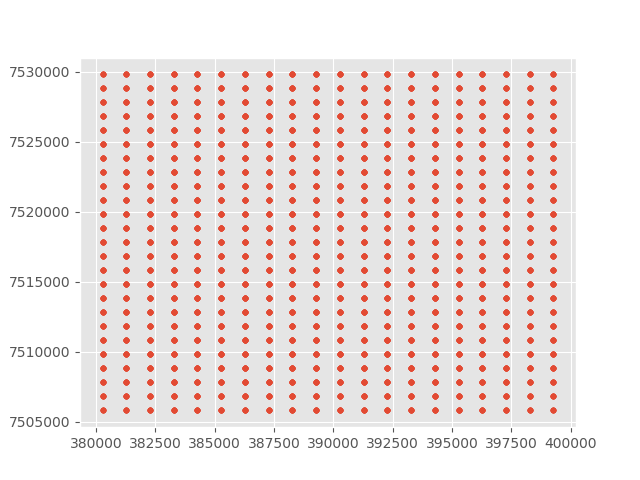

In [53]:
plt.figure()
plt.plot(coords[:, 0], coords[:, 1], '.')
plt.show()

In [54]:
x = np.unique(coords[:, 0])
y = np.unique(coords[:, 1])
freqs = out.freqs
x, y, freqs

(array([380275., 381275., 382275., 383275., 384275., 385275., 386275.,
        387275., 388275., 389275., 390275., 391275., 392275., 393275.,
        394275., 395275., 396275., 397275., 398275., 399275.]),
 array([7505812., 7506812., 7507812., 7508812., 7509812., 7510812.,
        7511812., 7512812., 7513812., 7514812., 7515812., 7516812.,
        7517812., 7518812., 7519812., 7520812., 7521812., 7522812.,
        7523812., 7524812., 7525812., 7526812., 7527812., 7528812.,
        7529812.]),
 array([0.125, 0.25 , 0.5  , 0.75 , 1.   , 1.25 ], dtype=float32))

In [74]:
out['srcpos']

<xarray.DataArray 'srcpos' (nsamp: 2652, strace: 6)>
array([[3.99275000e+05, 7.51881200e+06, 9.64561768e+02, 1.01540955e+03,
        0.00000000e+00, 9.24622118e-01],
       [3.99275000e+05, 7.51881200e+06, 9.64561768e+02, 1.01540955e+03,
        0.00000000e+00, 9.24622118e-01],
       [3.99275000e+05, 7.51891200e+06, 9.62947632e+02, 1.01379578e+03,
        0.00000000e+00, 9.26842570e-01],
       ...,
       [3.99275000e+05, 7.54071200e+06, 5.07066101e+02, 5.59786926e+02,
        0.00000000e+00, 4.97076941e+00],
       [3.99275000e+05, 7.54081200e+06, 4.98439026e+02, 5.51149658e+02,
        0.00000000e+00, 4.94879007e+00],
       [3.99275000e+05, 7.54081200e+06, 4.98439026e+02, 5.51149658e+02,
        0.00000000e+00, 4.94879007e+00]], dtype=float32)
Dimensions without coordinates: nsamp, strace
Attributes:
    srcpos_trace:      6
    srcpos_direction:  x y z wd hd pitch
    srcpos_units:      m m m m Deg Deg
    srcpos_undefined:  -1.0

In [73]:
out['emf']

<xarray.DataArray 'emf' (nsamp: 2652, dtrace: 6)>
array([[-1.1189164e-14, -1.3084969e-16, -1.3826881e-15, -6.7054738e-13,
         7.3513261e-12,  2.7855143e-13],
       [ 5.7439820e-15,  4.4020686e-17,  3.4185903e-16, -3.0917150e-13,
         5.4981996e-12,  1.4504604e-13],
       [-1.1588954e-14, -1.1460611e-16, -1.4657925e-15, -6.9871046e-13,
         7.8375561e-12,  2.8609835e-13],
       ...,
       [-2.3467998e-16,  1.1386963e-18, -2.4588169e-19,  1.4985940e-17,
        -1.5203120e-14, -2.4235577e-16],
       [ 1.7512540e-16, -8.6551501e-19,  1.4013077e-19,  6.3071815e-16,
         8.8773451e-14, -1.7810956e-15],
       [-2.4205142e-16,  1.4600699e-18, -1.9881839e-19, -3.1936173e-17,
        -1.8363047e-14, -1.7966364e-16]], dtype=float32)
Dimensions without coordinates: nsamp, dtrace
Attributes:
    emf_trace:             6
    emf_fieldtype:         Ex Ey Ez Hx Hy Hz
    emf_calstat:           calibrated calibrated calibrated calibrated calibr...
    emf_sign:              [1 1

In [81]:
out['jsrc']

<xarray.DataArray 'jsrc' (nsamp: 2652, jtrace: 1)>
array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)
Dimensions without coordinates: nsamp, jtrace
Attributes:
    jsrc_trace:      1
    jsrc_fieldtype:  Jx
    jsrc_units:      A
    jsrc_undefined:  -1.0

In [86]:
out

<xarray.Dataset>
Dimensions:  (csamp: 1, dtrace: 6, jtrace: 1, nogrid: 1, nsamp: 2652, nx: 1, ny: 1, nz: 1, strace: 6)
Dimensions without coordinates: csamp, dtrace, jtrace, nogrid, nsamp, nx, ny, nz, strace
Data variables:
    grid     (nx, ny, nz, nogrid) float32 9.96921e+36
    srcpos   (nsamp, strace) float32 399275.0 7518812.0 ... 0.0 4.94879
    jsrc     (nsamp, jtrace) float32 1.0 0.0 1.0 0.0 1.0 ... 0.0 1.0 0.0 1.0 0.0
    emf      (nsamp, dtrace) float32 -1.1189164e-14 ... -1.7966364e-16
    sigma_c  (csamp) float32 9.96921e+36
Attributes:
    version:                   0.0
    prochist:                  merging;/apps/EMGS/SBLwiz/1.26.27/bin/eldatnav...
    loghist:                   merging;eldatnavfix - Version: R-6-1-2;Elnavco...
    logid:                     unknown
    surveyid:                  Feasibility
    jobid:                     Feasibility
    recid:                     03Rx500a
    lineid:                    03Tx020a
    domain:                    frequency
  